## Using low dimensional embeddings to discover subtypes of breast cancer

This notebook is largely based on https://towardsdatascience.com/reduce-dimensions-for-single-cell-4224778a2d67 (credit to Nikolay Oskolkov).

notes:

- compare LDA to PCA results
- test different methods? or change parameter of one method? 


https://www.nature.com/articles/s41467-018-07582-3#data-availability

In [99]:
import pandas as pd
import numpy as np
#import GEOparse
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


In [81]:
GEO_ID = "GSE111229" # from the article 

#### Exercise 1. load the dataset into `rna_seq` using GEOparse.

In [11]:
# %load solutions/ex4_1.py
#rna_seq = GEOparse.get_GEO(geo=GEO_ID, destdir="./")

In [12]:
#dir(rna_seq)

In [13]:
#rna_seq.download_SRA??

In [14]:
#rna_seq.geotype

In [15]:
#rna_seq.phenotype_data.shape

In [16]:
#rna_seq.phenotype_data.shape

In [17]:
#rna_seq.to_soft('test', False)

In [19]:
cafs = pd.read_csv('CAFs.txt', sep='\t')

In [20]:
sorted(cafs.cluster.unique())

[1, 2, 3, 4]

In [21]:
expr = cafs

### The expression matrix
716 cells has been sequenced, and the expression levels has been assessed for 558 genes. Arranging the cells as rows and genes as columns we obtain an *expression matrix*.

In [22]:
expr.shape

(716, 558)

In [23]:
expr

,1110020A21Rik,1110046J04Rik,1190002F15Rik,1500015A07Rik,1500015O10Rik,1700010K23Rik,1700012D01Rik,1810011H11Rik,2010204K13Rik,2310057J18Rik,...,Wif1,Wisp2,Yy2,Zfp2,Zfp36,Zfp454,Zfp652os,Zfp81,Zfp944,cluster
SS2_15_0048_A3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,107.526495,0.0,201.533078,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,230.755035,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,175.071938,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,375.177236,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,290.743379,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A4,0.000000,0.0,0.000000,0.0,891.488043,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2
SS2_15_0048_A1,43.324338,0.0,0.000000,0.0,0.000000,0.0,0.0,20.527119,65.766243,0.000000,...,0.0,0.0,0.000000,0.0,768.997431,0.000000,0.0,0.0,2.413509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS2_15_0049_P19,0.000000,0.0,0.000000,0.0,1012.999120,0.0,0.0,0.000000,37.231979,0.000000,...,0.0,0.0,21.453518,0.0,19.602162,1.869748,0.0,0.0,34.520490,3
SS2_15_0049_P18,37.696628,0.0,0.000000,0.0,1562.238996,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,41.641731,0.000000,0.0,0.0,0.000000,2
SS2_15_0049_P21,0.000000,0.0,53.257827,0.0,5.817578,0.0,0.0,112.228306,62.542484,19.583052,...,0.0,0.0,0.000000,0.0,70.246018,0.000000,0.0,0.0,0.000000,1
SS2_15_0049_P23,0.000000,0.0,0.000000,0.0,2411.205731,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,55.993812,2


Before going further, try to reflect for a moment how you would try to illuminate any pattern in this data, given what you already know.

#### Plot the expression matrix

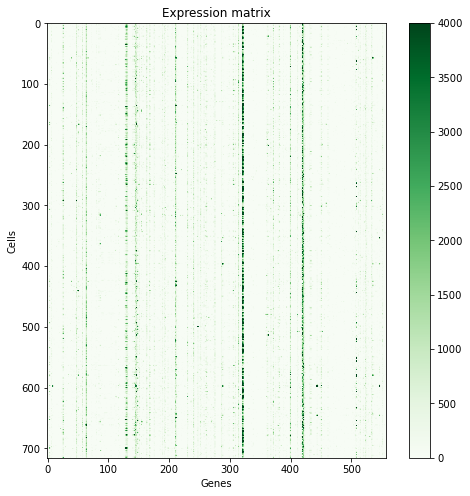

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(expr.values, cmap='Greens', vmax=4000, vmin=0)
plt.title('Expression matrix')
plt.ylabel('Cells')
plt.xlabel('Genes')
plt.colorbar()
plt.show()

#### Exercise 2. The data is very sparse (most entries are zero), can you quantify how sparse it is? (i.e. how many of the entries are 0) 

In [25]:
# %load solutions/ex4_2.py
np.count_nonzero(expr.values) / np.prod(expr.shape)

# only 20% of the entries are non-zero.

0.19622154141887427

In [26]:
print("\n" + "Dimensions of input file: " + str(expr.shape) + "\n")
print("\n" + "Last column corresponds to cluster assignments: " + "\n")
print(expr.iloc[0:4, (expr.shape[1]-4):expr.shape[1]])
X = expr.values[:,0:(expr.shape[1]-1)]
Y = expr.values[:,expr.shape[1]-1] #cluster
X = np.log(X + 1)


Dimensions of input file: (716, 558)


Last column corresponds to cluster assignments: 

                Zfp652os  Zfp81  Zfp944  cluster
SS2_15_0048_A3       0.0    0.0     0.0        1
SS2_15_0048_A6       0.0    0.0     0.0        1
SS2_15_0048_A5       0.0    0.0     0.0        1
SS2_15_0048_A4       0.0    0.0     0.0        2


### TASK 1. How many cells belongs to each cluster (1-4)?  Is some cluster over-represented? 

In [34]:
#We find the cells that are in the cluster 1 with this command and create a new variable. Then we check the shape of the variable we created.
cells_1=expr.loc[expr['cluster']==1]
cells_1.shape

(490, 558)

In [35]:
#We do the same thing to other cluster 2
cells_2=expr.loc[expr['cluster']==2]
cells_2.shape

(143, 558)

In [36]:
#And cluster 3
cells_3=expr.loc[expr['cluster']==3]
cells_3.shape

(41, 558)

In [37]:
#And cluster 4
cells_4=expr.loc[expr['cluster']==4]
cells_4.shape

(42, 558)

In [38]:
cafs.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

### Decomposing the signals
Now that we have gained some basic understanding of the data, we see it is fit for machine learning. You have already seen a few techniques to reduce data dimensionality reduction. We start with PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
#from matplotlib import cm
#dir(cm) # available colors

#### Exercise 3. Perform PCA on the expression data and visualize the results (with colors to represent the ground truth clusters)


### TASK 2. Can we add % for PC2 and PC1 to the plot? 

Text(0, 0.5, 'PC2')

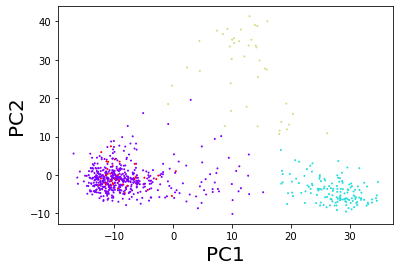

In [132]:
# %load solutions/ex4_3.py

model = PCA()
pca = model.fit_transform(X)

plt.scatter(pca[:, 0], pca[:, 1], c = Y, cmap = 'rainbow', s = 1)
plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)



Text(0, 0.5, 'PC2')

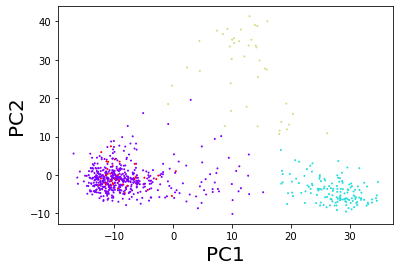

In [141]:
# %load solutions/ex4_3.py
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#import plotly.express as px
#problem with importing plotly, so explained_variance_ratio_ not working. We would use this to add percentage to the plot like this:
#var = np.round(pca.explained_variance_ratio_ * 100, decimal=1)
#Then adding to plt.xlabel: format(var[0]) and to plt.ylabel format(var[1])

model = PCA()
pca = model.fit_transform(X)

plt.scatter(pca[:, 0], pca[:, 1], c = Y, cmap = 'rainbow', s = 1)
plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)

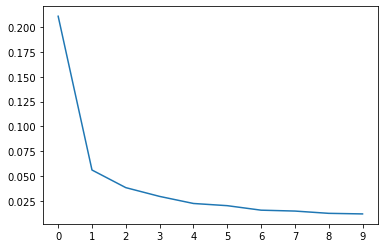

In [44]:
plt.plot(model.explained_variance_ratio_[:10])
plt.xticks(range(10));plt.show()

### TASK 3. Try SparsePCA?

In [155]:
#funtion is SparsePCA, or maybe you can check help from sklearn.
from sklearn.decomposition import SparsePCA
?SparsePCA
sparse=SparsePCA(expr, alpha=5)
sparse



SparsePCA(alpha=5,
          n_components=                 1110020A21Rik  1110046J04Rik  1190002F15Rik  1500015A07Rik  \
SS2_15_0048_A3        0.000000            0.0       0.000000            0.0   
SS2_15_0048_A6        0.000000            0.0       0.000000            0.0   
SS2_15_0048_A5        0.000000            0.0       0.000000            0.0   
SS2_15_0048_A4        0.000000            0.0       0.000000            0.0   
SS2_15_0048_A1       43.324338            0.0       0.000000            0.0   
...                        ...            ...            ...            ...   
SS2_15_0049_P19       0.000000            0.0       0.000000            0.0   
SS2_15_0049_P18      37.696628            0.0       0.0000...
SS2_15_0049_P18   0.0   41.641731  0.000000       0.0    0.0   0.000000   
SS2_15_0049_P21   0.0   70.246018  0.000000       0.0    0.0   0.000000   
SS2_15_0049_P23   0.0    0.000000  0.000000       0.0    0.0  55.993812   
SS2_15_0049_P22   0.0  390.824106  0.00

In [156]:
np.count_nonzero(sparse) 

1

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

        Gene      Score
422    Rn45s  39.249111
64       B2m  12.880958
212     Fth1   8.174487
287    Lars2   7.385672
147     Cst3   6.857356
315   Malat1   6.290840
420     Rgs5   4.681367
524    Timp1   4.486659
131   Col3a1   3.229705
130   Col1a2   3.062976
537  Trmt61b   3.020343
145    Crip1   2.991499
322      Mgp   2.787057
368      Mt1   2.673895
400    Postn   2.401428
534     Tpm1   2.258763
248    Hspa5   2.133318
241   Higd1b   2.094767
220     Ggt1   2.003810
122    Cldn4   1.951643


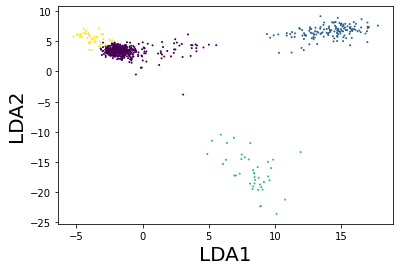

In [47]:
model = LinearDiscriminantAnalysis(n_components = 2, priors = None, shrinkage = 'auto', 
                                   solver = 'eigen', store_covariance = False, tol = 0.0001)
lda = model.fit_transform(X, Y)
plt.scatter(lda[:, 0], lda[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.xlabel("LDA1", fontsize = 20); plt.ylabel("LDA2", fontsize = 20)
feature_importances = pd.DataFrame({'Gene':np.array(expr.columns)[:-1], 
                                    'Score':abs(model.coef_[0])})
print(feature_importances.sort_values('Score', ascending = False).head(20))

The way to interpret the data above: we clearly see the data lay in three clusters, suggesting  we have found 3 different separable expression-signatures. However, we also see one cluster is occupied by 2 clusters (the colors are imposed by the fact that we know the "ground truth", but unsupervised methods are generally used for data exploration in which we do not know of these things.


# Non-linear methods

# t-SNE

t-SNE is a very popular decomposition technique used in molecular biology, especially for visualization purposes. t-SNE does generally not cope well with high dimensionality, so it is common to first transform the data with PCA and then run this through t-SNE. Here we will do both with and without prereducing the dimensionality.


https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [48]:
from sklearn.manifold import TSNE

In [49]:
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X)

Text(0, 0.5, 'tSNE2')

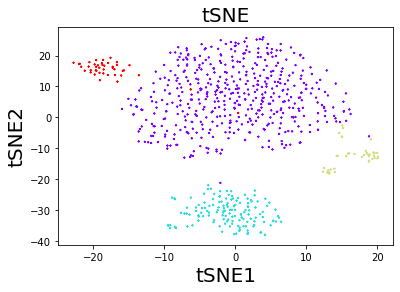

In [50]:
plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

#### Exercise 4. Reduce the data first with PCA to 30 principal components, then rerun the tSNE on this transformed data. 

Text(0, 0.5, 'tSNE2')

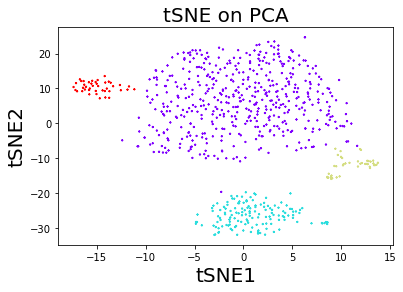

In [128]:
# %load solutions/ex4_4.py
X_reduced = PCA(n_components = 30).fit_transform(X)
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 50)
tsne = model.fit_transform(X_reduced)

plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE on PCA', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

### TASK 4. Try different perplexity values (from range 5 to 50)

You can maybe just modify the code above. 




In [63]:
#When the perplexity value is large, the values in every cluster are close to each other and organized. As we deacrease the
#perplexity, the values in a cluster become more sparse and they create more smaller groups within the clusters. This is because
#perplexity represents the number of expected neighbours within a cluster. If we put the perplexity to 5, that would mean that
#every value in a cluster has about 5 close neighbours. And when we raise the value, the number of close neighbours for every value 
#is increased. The clusters become more "defined" when the perplexity is high.
